# **PROJECT SOURCE CODE**

# PROJECT TITLE

### **Data Driven Marketing Optimization: Leveraging Customer Segmentation in Online Retail Purchasing**

The data used in this project was obtained from the UCI repository. It's known as the Online Retail II Dataset, and it provides valuable insights into customer behaviour and purchasing patterns in the online retail industry (Chen 2019) .The attribute information of the dataset are shown below. [UCI Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii).


**Attribute Information:**

• InvoiceNo: The unique Invoice number for purchases made. It is a A 6-digit integral number and onec satarting with 'c' indicates a cancellation.

• StockCode: Unique Product code. Product-specific 5-digit integral numbers.•

• Description: Item name and description. It is nominal.

• Quantity: The quantities of each  item per transaction. It is numeric.

• InvoiceDate: Invoice date and time.

• UnitPrice: Unit price. Numeric. Product price per unit (£).

• CustomerID: A five digit number uniquely assigned to each customer.

• Country:  The name of the country where a customer resides.


In [ ]:
# Importing necessary libaries for data preparation and preprocessing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading the first worksheet
df1_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSQfxucITZJe5N4nZjaV8SsKo_7Cxu4Azsl7WxqrpRF2PhYnIKDp7IInIcIgJBzCS0clcI7YoWN5Lwf/pub?output=csv'
df1 = pd.read_csv(df1_url)

# Reading the second worksheet
df2_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTSlSWNSLFaHrzuAy9elJGBCMSBGEW7_2B5b6JnReeoIx9mv90JviVuT-VxZCxUdNvFXixqovHSzvLP/pub?output=csv'
df2 = pd.read_csv(df2_url)

In [ ]:
df1.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

       InvoiceDate  Price  Customer ID         Country  
0  01/12/2009 7:45   6.95      13085.0  United Kingdom  
1  01/12/2009 7:45   6.75      13085.0  United Kingdom  
2  01/12/2009 7:45   6.75      13085.0  United Kingdom  
3  01/12/2009 7:45   2.10      13085.0  United Kingdom  
4  01/12/2009 7:45   1.25      13085.0  United Kingdom

In [ ]:
df2.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       InvoiceDate  Price  Customer ID         Country  
0  01/12/2010 8:26   2.55      17850.0  United Kingdom  
1  01/12/2010 8:26   3.39      17850.0  United Kingdom  
2  01/12/2010 8:26   2.75      17850.0  United Kingdom  
3  01/12/2010 8:26   3.39      17850.0  United Kingdom  
4  01/12/2010 8:26   3.39      17850.0  United Kingdom

In [ ]:
# Combining the two datasets
online_retail2_df = pd.concat([df1, df2], ignore_index=True)
online_retail2_df

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899          CHILDREN'S APRON DOLLY GIRL         6   
1067367  581587     23254         CHILDRENS CUTLERY DOLLY GIRL         4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138         BAKING SET 9 PIECE RETROSPOT         3   
1067370  581587      POST                              POSTAGE         1   

              InvoiceDate  Price  Customer ID         Country  
0         01/12/2009 7:45   6.95      13085.0  United Kingdom  
1         01/12/2009 7:45   6.75      13085.0  United Kingdom  
2         01/12/2009 7:45   6.75      13085.0  United Kingdom  
3         01/12/2009 7:45   2.10      13085.0  United Kingdom  
4         01/12/2009 7:45   1.25      13085.0  United Kingdom  
...                   ...    ...          ...             ...  
1067366  09/12/2011 12:50   2.10      12680.0          France  
1067367  09/12/2011 12:50   4.15      12680.0          France  
1067368  09/12/2011 12:50   4.15      12680.0          France  
1067369  09/12/2011 12:50   4.95      12680.0          France  
1067370  09/12/2011 12:50  18.00      12680.0          France  

[1067371 rows x 8 columns]

##**Dataset Assesment**

In [ ]:
online_retail2_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
online_retail2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
print(f'Number of rows:  {len(online_retail2_df)}')
print("--------------------------------")
print(f'Number of columns:  {len(online_retail2_df.columns)}')
print("--------------------------------")
print(f'Dataset Shape:  {online_retail2_df.shape}')
print("--------------------------------")
print(online_retail2_df.dtypes)

Number of rows:  1067371
--------------------------------
Number of columns:  8
--------------------------------
Dataset Shape:  (1067371, 8)
--------------------------------
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


## Data Preprocessing


### Data Cleaning

Sum of the Missing Data

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
--------------------------------
Percentage of Missing Data

Customer ID    22.77
Description     0.41
dtype: float64
-------------------------------------------

PLOT of Missing Data



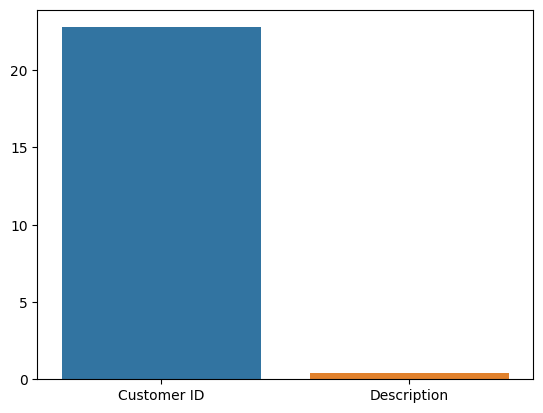

In [ ]:
# Dealing with missing data records

print("Sum of the Missing Data\n")
print(online_retail2_df.isna().sum())

# Check percentage of this missing data
percentage_mis = round(online_retail2_df.isna().sum()/len(online_retail2_df) * 100, 2).sort_values(ascending=False)
percentage_mis = percentage_mis[percentage_mis >0]
print("--------------------------------")
print("Percentage of Missing Data\n")
print(percentage_mis)

print("-------------------------------------------\n")
print("PLOT of Missing Data\n")
sns.barplot(x=percentage_mis.index, y=percentage_mis)
plt.show()

**Dealing with the missing data**: Missing data can be replaced, dropped or ignored depending on the project and available information. In this case, the missing data will be dropped as there are no enough information to make a replacement.

In [ ]:
#Exploring 'Customer ID' column for missing values.
online_retail2_df[online_retail2_df['Customer ID'].isnull()].head(5)

Invoice StockCode                Description  Quantity       InvoiceDate  \
263  489464     21733               85123a mixed       -96  01/12/2009 10:52   
283  489463     71477                      short      -240  01/12/2009 10:52   
284  489467    85123A                21733 mixed      -192  01/12/2009 10:53   
470  489521     21646                        NaN       -50  01/12/2009 11:44   
577  489525    85226C  BLUE PULL BACK RACING CAR         1  01/12/2009 11:49   

     Price  Customer ID         Country  
263   0.00          NaN  United Kingdom  
283   0.00          NaN  United Kingdom  
284   0.00          NaN  United Kingdom  
470   0.00          NaN  United Kingdom  
577   0.55          NaN  United Kingdom

In [ ]:
#Exploring the 'Description' column for missing values.
online_retail2_df[online_retail2_df['Description'].isnull()].head(5)

Invoice StockCode Description  Quantity       InvoiceDate  Price  \
470   489521     21646         NaN       -50  01/12/2009 11:44    0.0   
3114  489655     20683         NaN       -44  01/12/2009 17:26    0.0   
3161  489659     21350         NaN       230  01/12/2009 17:39    0.0   
3731  489781     84292         NaN        17  02/12/2009 11:45    0.0   
4296  489806     18010         NaN      -770  02/12/2009 12:42    0.0   

      Customer ID         Country  
470           NaN  United Kingdom  
3114          NaN  United Kingdom  
3161          NaN  United Kingdom  
3731          NaN  United Kingdom  
4296          NaN  United Kingdom

From the above, it can be seen that many with description missing also have the customer ID missing meaning dropping the missing Customer ID rows, will help drop some or all the missing description rows.

In [ ]:
# Droping missing values.
online_retail2_df.dropna(subset=['Customer ID'], inplace = True)

In [ ]:
# Confirming if missing values have been dropped.
online_retail2_df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

As seen from the above, droping all missing Customer ID also dropped the missing description. Therefore, mising data have been dealt with





In [ ]:
# Dealing with dublicate data records

duplicate_count = online_retail2_df.duplicated(keep='first').sum()
print(duplicate_count)
print("--------------------------------\n")

duplicates = online_retail2_df[online_retail2_df.duplicated(keep=False)].iloc[:, :2]
print(duplicates)
print("--------------------------------\n")

# Drop duplicates
online_retail2_df.drop_duplicates(keep='first', inplace=True)

# Confirming the removal of dublicates
duplicate_count = online_retail2_df.duplicated(keep='first').sum()
print(duplicate_count)

26479
--------------------------------

        Invoice StockCode
362      489517     21913
363      489517     21912
365      489517     21821
367      489517     22319
368      489517     22130
...         ...       ...
1067136  581538     22068
1067150  581538     23318
1067153  581538     22992
1067160  581538     22694
1067162  581538     23343

[51540 rows x 2 columns]
--------------------------------

0


In [ ]:
# Checking the Invoice Column : From data description, it was told that invoices starting with 'c' are cancelled orders.
canc_invoices = online_retail2_df[online_retail2_df['Invoice'].apply(lambda x: x.startswith(('C', 'c')) )]
canc_invoices.head()

Invoice StockCode                    Description  Quantity  \
178  C489449     22087       PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A   CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895  POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896             POTTING SHED TWINE        -6   
182  C489449     22083     PAPER CHAIN KIT RETRO SPOT       -12   

          InvoiceDate  Price  Customer ID    Country  
178  01/12/2009 10:33   2.95      16321.0  Australia  
179  01/12/2009 10:33   1.65      16321.0  Australia  
180  01/12/2009 10:33   4.25      16321.0  Australia  
181  01/12/2009 10:33   2.10      16321.0  Australia  
182  01/12/2009 10:33   2.95      16321.0  Australia

In [ ]:
# Removing rows that start with 'C' or 'c' from the Dataset

online_retail2_df = online_retail2_df[online_retail2_df['Invoice'].apply(lambda x: not x.startswith(('C', 'c')) )]

# Confirming if the rows have been removed.
canc_invoices = online_retail2_df[online_retail2_df['Invoice'].apply(lambda x: x.startswith(('C', 'c')))]
canc_invoices

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [ ]:
# Checking the Price attribute for any inconsistent data pattern
# Checking for any '0' or negative price  value as this is as good as null.

online_retail2_df[online_retail2_df['Price'] <=0].head()

Invoice StockCode                    Description  Quantity  \
4674   489825     22076               6 RIBBONS EMPIRE        12   
6781   489998     48185            DOOR MAT FAIRY CAKE         2   
16107  490727         M                         Manual         1   
18738  490961     22065  CHRISTMAS PUDDING TRINKET POT         1   
18739  490961     22142    CHRISTMAS CRAFT WHITE FAIRY        12   

            InvoiceDate  Price  Customer ID         Country  
4674   02/12/2009 13:34    0.0      16126.0  United Kingdom  
6781   03/12/2009 11:19    0.0      15658.0  United Kingdom  
16107  07/12/2009 16:38    0.0      17231.0  United Kingdom  
18738  08/12/2009 15:25    0.0      14108.0  United Kingdom  
18739  08/12/2009 15:25    0.0      14108.0  United Kingdom

In [ ]:
# Droping the rows with 0 or negative prices
online_retail2_df = online_retail2_df.drop(online_retail2_df[online_retail2_df['Price'] <= 0].index)

# Confirm if they are removed
online_retail2_df[online_retail2_df['Price'] <=0].head()

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [ ]:
# Checking the Quantity Column for any insistent data pattern
print(online_retail2_df[online_retail2_df['Quantity'] <=0].head())
print('------------------------------------------\n')

# Checking the value counts
online_retail2_df['Quantity'].value_counts()

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []
------------------------------------------



1        141623
12       117418
2        114527
6         78246
4         60909
          ...  
12480         1
1960          1
9360          1
6336          1
80995         1
Name: Quantity, Length: 437, dtype: int64

In [ ]:
# Checking the Country feature

online_retail2_df['Country'].value_counts()

United Kingdom          700388
Germany                  16432
EIRE                     15565
France                   13511
Netherlands               5085
Spain                     3662
Belgium                   3055
Switzerland               3005
Portugal                  2356
Australia                 1789
Channel Islands           1551
Italy                     1442
Sweden                    1317
Norway                    1289
Cyprus                    1136
Finland                   1032
Austria                    922
Denmark                    778
Greece                     657
Unspecified                518
Poland                     504
Japan                      468
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     319
Malta                      282
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        122
Brazil                      94
Thailand

In [ ]:
# Checking for the number of rows left after data cleaning phase
online_retail2_df.shape

(779425, 8)

### Feature Extraction and Selection




In [ ]:
# Adding a column for the total price called 'Total_Price'

online_retail2_df['Total_Price'] = online_retail2_df['Quantity'] * online_retail2_df['Price']

In [ ]:
# Converting the 'date' column to datetime format
online_retail2_df['InvoiceDate'] = pd.to_datetime(online_retail2_df['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [ ]:
# Splitting the datetime column to form day, weekday, month, year and time

online_retail2_df['Day'] = pd.to_datetime(online_retail2_df['InvoiceDate']).dt.day
online_retail2_df['Weekday'] = pd.to_datetime(online_retail2_df['InvoiceDate']).dt.weekday
online_retail2_df['Month'] = pd.to_datetime(online_retail2_df['InvoiceDate']).dt.month
online_retail2_df['Year'] = pd.to_datetime(online_retail2_df['InvoiceDate']).dt.year
online_retail2_df['Time'] = pd.to_datetime(online_retail2_df['InvoiceDate']).dt.time

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
online_retail2_df['Weekday'] = online_retail2_df['Weekday'].map(lambda x: weekdays[x])

In [ ]:
online_retail2_df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total_Price  Day  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom         83.4    1   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0    1   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0    1   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom        100.8    1   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom         30.0    1   

   Weekday  Month  Year      Time  
0  Tuesday     12  2009  07:45:00  
1  Tuesday     12  2009  07:45:00  
2  Tuesday     12  2009  07:45:00  
3  Tuesday     12  2009  07:45:00  
4  Tuesday     12  2009  07:45:00

In [ ]:
# Adding description lenght column for analysis purpose

online_retail2_df['Desc_lenght'] = online_retail2_df['Description'].apply(len)
online_retail2_df.sample(5)

Invoice StockCode                          Description  Quantity  \
442942  531553     21056                DOCTOR'S BAG SOFT TOY         2   
770166  558540     22727             ALARM CLOCK BAKELIKE RED        12   
997906  576688     84347  ROTATING SILVER ANGELS T-LIGHT HLDR        24   
248609  513422     21621           VINTAGE UNION JACK BUNTING         1   
957954  573876    85049C               ROMANTIC PINKS RIBBONS         2   

               InvoiceDate  Price  Customer ID         Country  Total_Price  \
442942 2010-11-09 09:34:00   8.95      16503.0  United Kingdom         17.9   
770166 2011-06-30 12:15:00   3.75      17706.0  United Kingdom         45.0   
997906 2011-11-16 12:16:00   2.55      16717.0  United Kingdom         61.2   
248609 2010-06-24 12:49:00   8.50      14527.0  United Kingdom          8.5   
957954 2011-11-01 12:48:00   1.25      16360.0  United Kingdom          2.5   

        Day    Weekday  Month  Year      Time  Desc_lenght  
442942    9    Tuesday     11  2010  09:34:00           21  
770166   30   Thursday      6  2011  12:15:00           24  
997906   16  Wednesday     11  2011  12:16:00           35  
248609   24   Thursday      6  2010  12:49:00           26  
957954    1    Tuesday     11  2011  12:48:00           22

## Exploratory Data Analysis

In [ ]:
# Getting summary statistics of all mumeric columns

online_retail2_df.describe().transpose()

count          mean          std        min       25%  \
Quantity     779425.0     13.489370   145.855814      1.000      2.00   
Price        779425.0      3.218488    29.676140      0.001      1.25   
Customer ID  779425.0  15320.360461  1695.692775  12346.000  13971.00   
Total_Price  779425.0     22.291823   227.427075      0.001      4.95   
Day          779425.0     15.390961     8.657939      1.000      8.00   
Month        779425.0      7.417059     3.422319      1.000      5.00   
Year         779425.0   2010.432051     0.568385   2009.000   2010.00   
Desc_lenght  779425.0     26.504033     5.394037      6.000     23.00   

                  50%       75%       max  
Quantity         6.00     12.00   80995.0  
Price            1.95      3.75   10953.5  
Customer ID  15247.00  16794.00   18287.0  
Total_Price     12.48     19.80  168469.6  
Day             15.00     23.00      31.0  
Month            8.00     11.00      12.0  
Year          2010.00   2011.00    2011.0  
Desc_lenght     27.00     31.00      35.0

In [ ]:
# Getting summary statistics for all non-numeric columns

online_retail2_df.describe(include=object).transpose()

count unique                                 top    freq
Invoice      779425  36969                              576339     542
StockCode    779425   4631                              85123A    5023
Description  779425   5241  WHITE HANGING HEART T-LIGHT HOLDER    5016
Country      779425     41                      United Kingdom  700388
Weekday      779425      7                            Thursday  155986
Time         779425    775                            12:36:00    3298

In [ ]:
# Checking for Longest messages
online_retail2_df[online_retail2_df['Desc_lenght'] == online_retail2_df['Desc_lenght'].max()]['Description'].iloc[0]

'15CM CHRISTMAS GLASS BALL 20 LIGHTS'

In [ ]:
# Checking for shortest messages
online_retail2_df[online_retail2_df['Desc_lenght'] == online_retail2_df['Desc_lenght'].min()]['Description'].iloc[0]

'Manual'

In [ ]:
# Exploring the weekday column
online_retail2_df['Weekday'].value_counts()

Thursday     155986
Tuesday      134021
Wednesday    130777
Sunday       130137
Monday       124947
Friday       103157
Saturday        400
Name: Weekday, dtype: int64

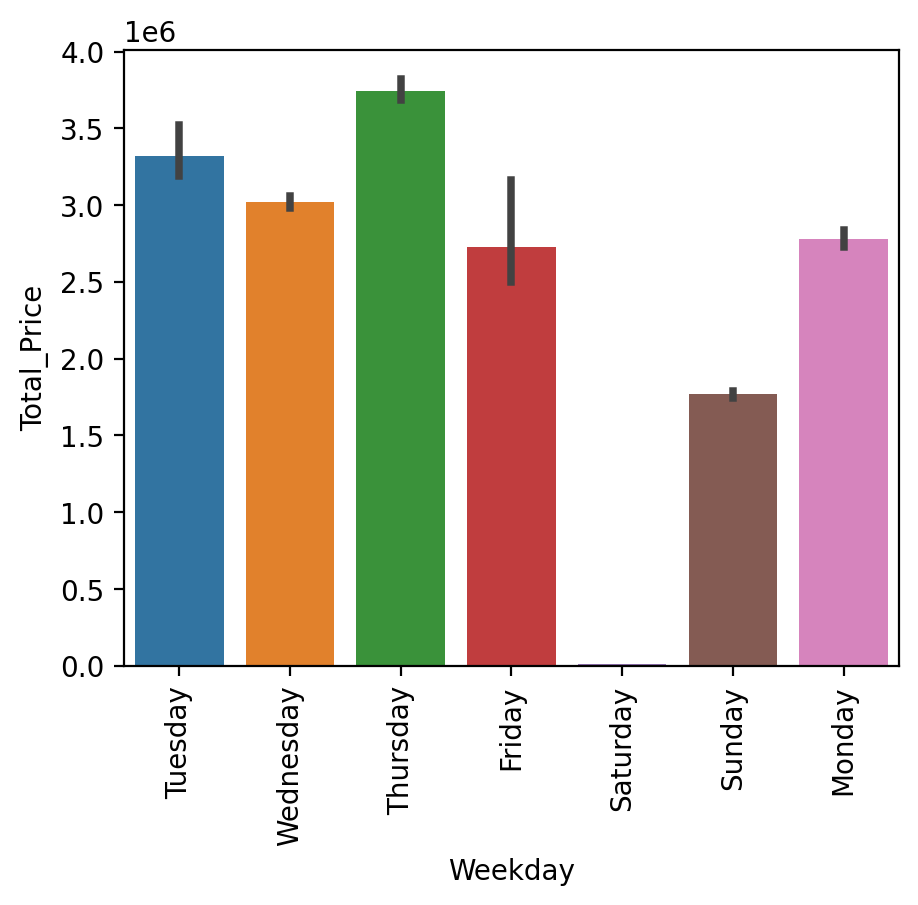

In [ ]:
plt.figure(figsize=(5,4),dpi=200)
sns.barplot(data=online_retail2_df,y='Total_Price',x='Weekday',estimator=np.sum)
plt.xticks(rotation=90);

In [ ]:
# Exploring the months column
online_retail2_df['Month'].value_counts()

# Below shows that the 12 months are fully represented.

11    122073
10     97516
9      73797
12     72969
3      58652
6      57614
5      56306
7      53223
8      52819
4      49264
2      42746
1      42446
Name: Month, dtype: int64

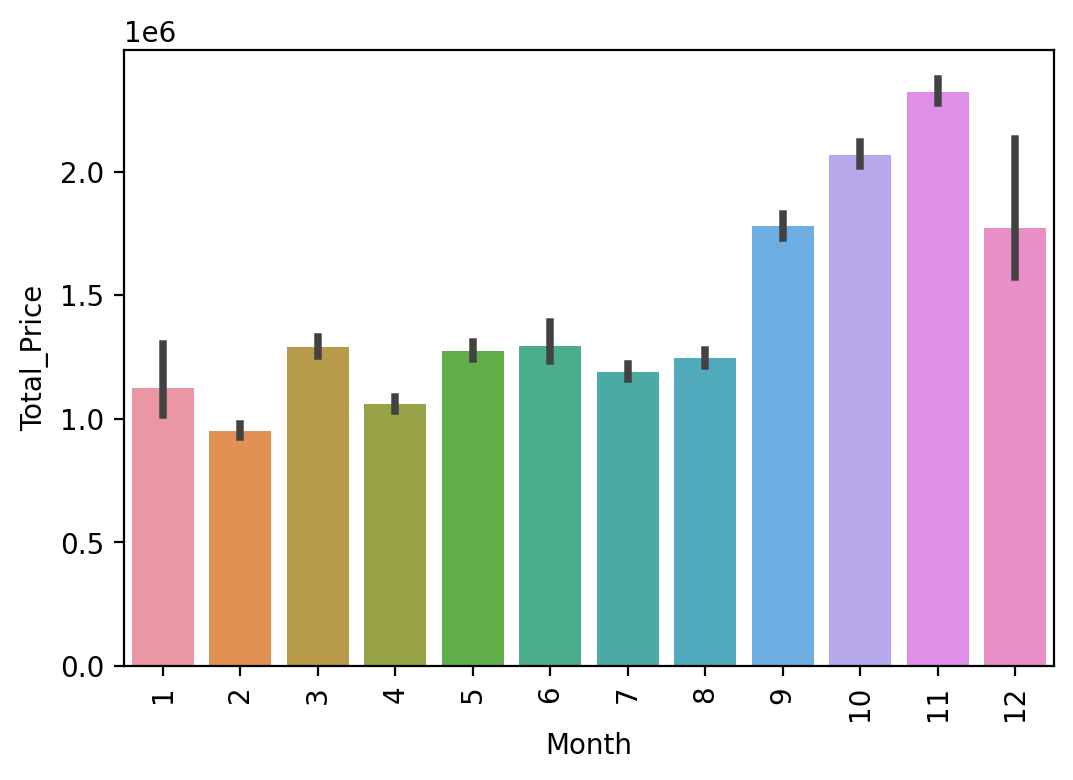

In [ ]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=online_retail2_df,y='Total_Price',x='Month',estimator=np.sum)
plt.xticks(rotation=90);

In [ ]:
# Exploring the invoice year column
online_retail2_df['Year'].value_counts()

# Below shows that the data counts between the year 2009 and 2011.
# 2009 have a small count compared to the others as the data collection for that year were only for december.

2010    382130
2011    367023
2009     30272
Name: Year, dtype: int64

<Axes: xlabel='Year', ylabel='Total_Price'>

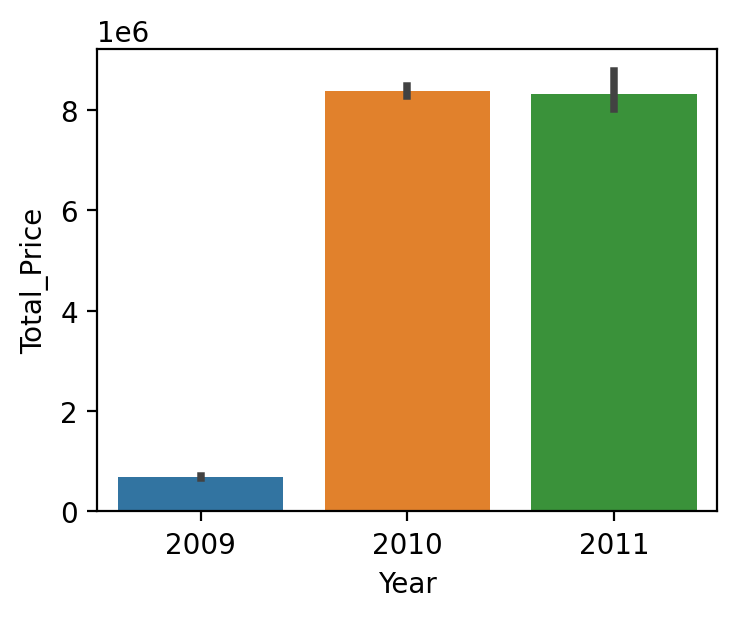

In [ ]:
plt.figure(figsize=(4,3),dpi=200)
sns.barplot(data=online_retail2_df,y='Total_Price',x='Year',estimator=np.sum)

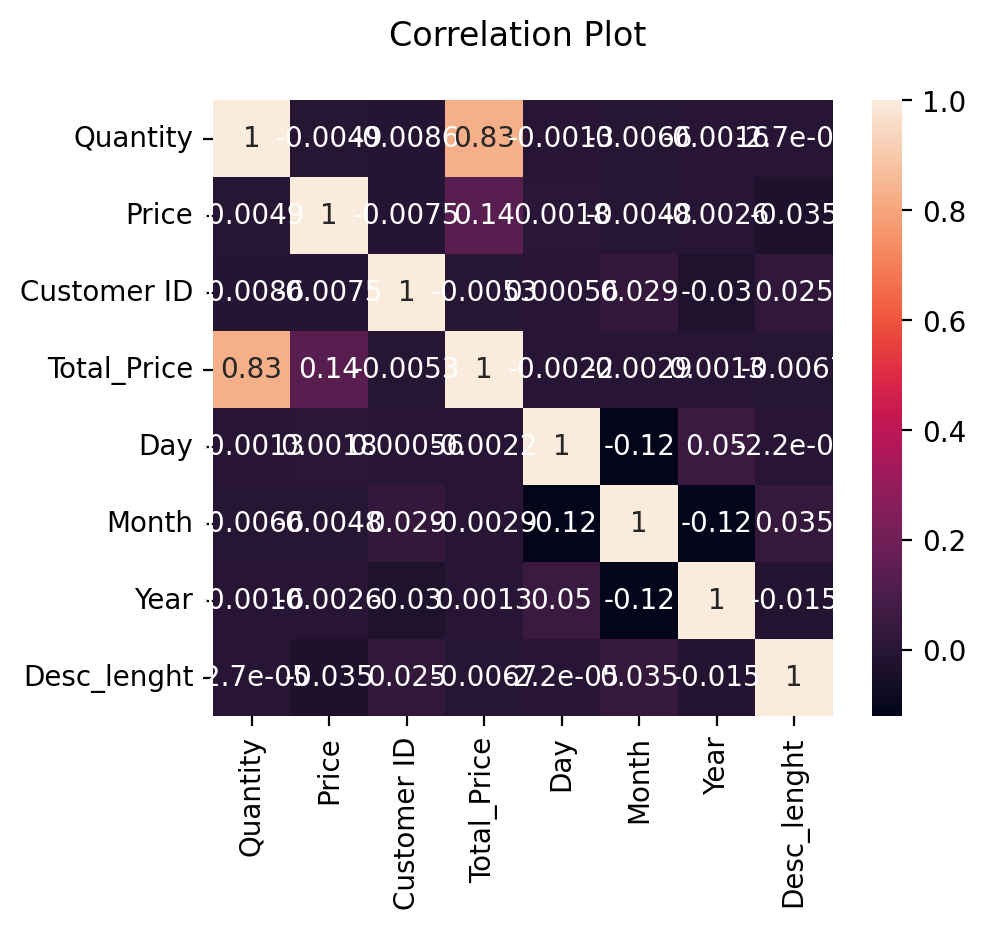

In [ ]:
# Showing the correlation of the different columns

plt.figure(figsize=(5,4),dpi=200)
sns.heatmap(online_retail2_df.corr(numeric_only= True), annot=True)
plt.title('Correlation Plot \n')
plt.show()

# From the below correlation plot, it can be seen that only quantity and total price are higly correlated.

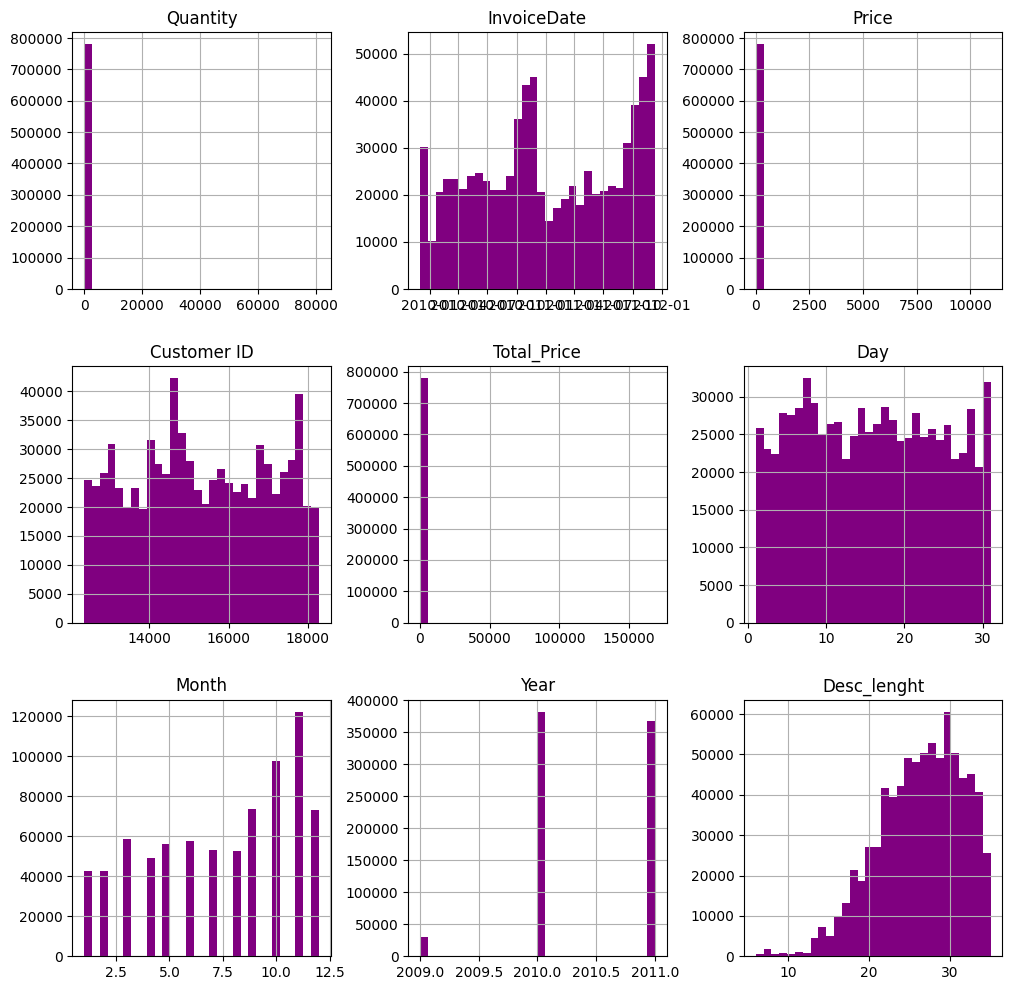

In [ ]:
# Plots of the numerical columns
online_retail2_df.hist(figsize=(12, 12), bins=30,color='purple')
plt.show()

From the plots of the numeric columns:



*   Quantity:

*  Invoicedate:

*   Price

*   Customer ID

*   Total_Price

*   Day

*   Month

*   Year

*   Desc_lenght


In [ ]:
# Exploring the Country Column

country_perc = round(online_retail2_df['Country'].value_counts()/len(online_retail2_df) *100, 4).sort_values(ascending=False)
print("Percentage of Each Country Customer Count\n")
print(country_perc)

Percentage of Each Country Customer Count

United Kingdom          89.8596
Germany                  2.1082
EIRE                     1.9970
France                   1.7335
Netherlands              0.6524
Spain                    0.4698
Belgium                  0.3920
Switzerland              0.3855
Portugal                 0.3023
Australia                0.2295
Channel Islands          0.1990
Italy                    0.1850
Sweden                   0.1690
Norway                   0.1654
Cyprus                   0.1457
Finland                  0.1324
Austria                  0.1183
Denmark                  0.0998
Greece                   0.0843
Unspecified              0.0665
Poland                   0.0647
Japan                    0.0600
USA                      0.0525
United Arab Emirates     0.0491
Singapore                0.0435
Israel                   0.0409
Malta                    0.0362
Canada                   0.0293
Iceland                  0.0285
Lithuania                0.01

PLOT of Country Counts in Percentages



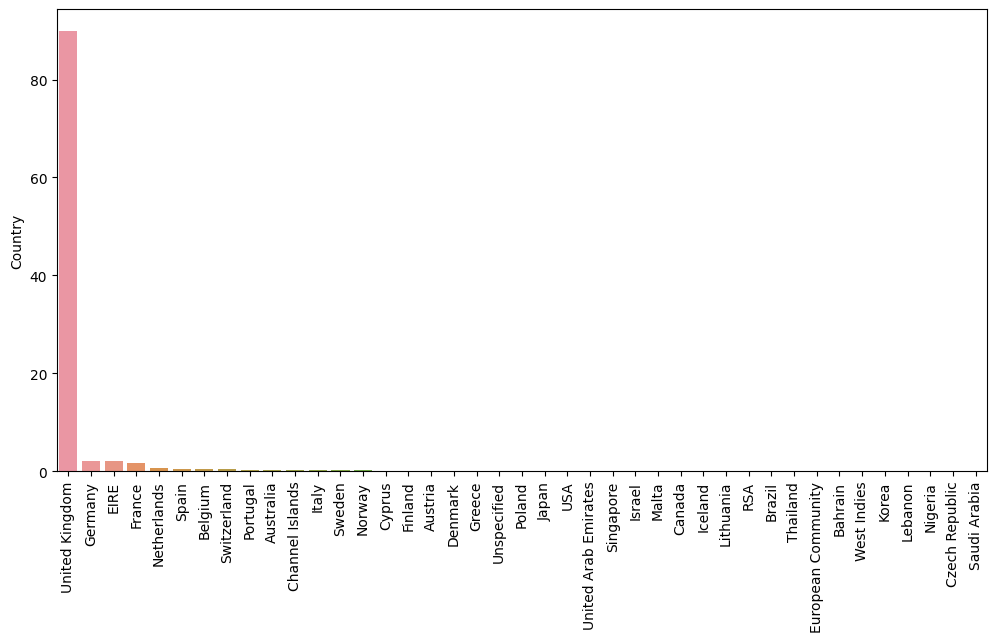

In [ ]:
print("PLOT of Country Counts in Percentages\n")
plt.figure(figsize = (12,6), dpi = 100)
sns.barplot(x=country_perc.index, y=country_perc)
plt.xticks(rotation=90)
plt.show()

From the above, it can be seen that UK had the highest with the others almost close to zero percent.

From above it can be seen that saturday had little to no orders.

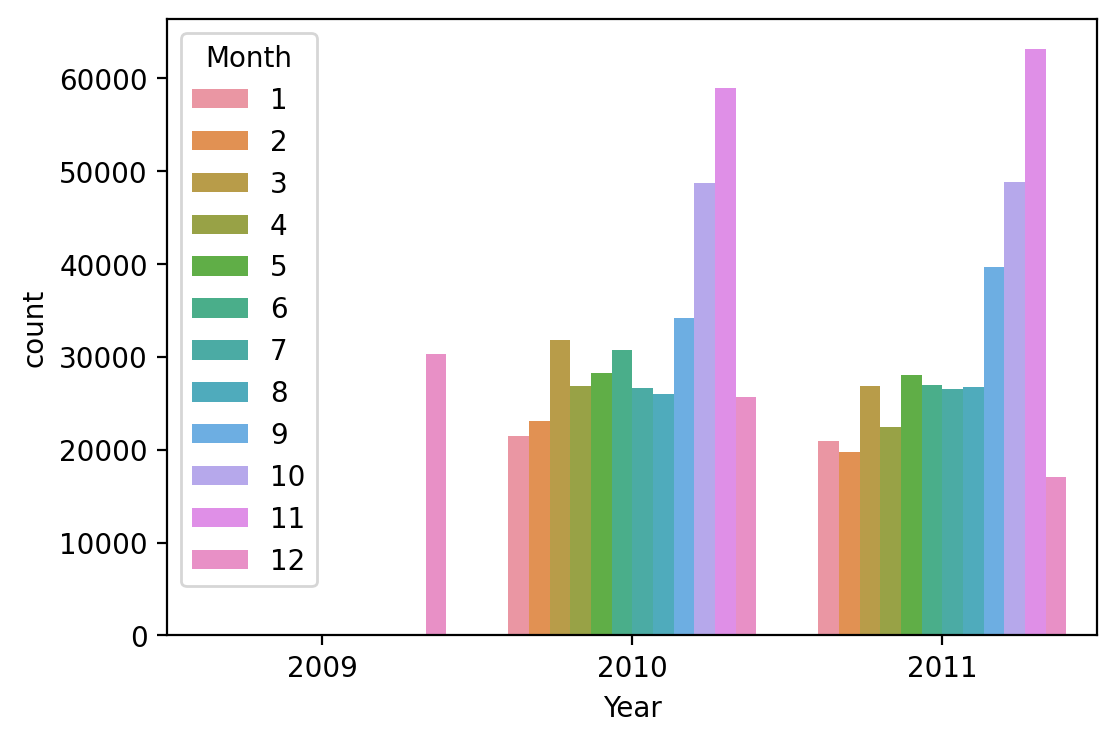

In [ ]:
# Plot of year and month count

plt.figure(figsize=(6,4), dpi=200)

# plot a bar chart
sns.countplot(x="Year", hue="Month", data=online_retail2_df);

From the above it can be seen that 2009 had records for just december. 2010 and 2011 made highest count of orders in november.

In [ ]:
# Creating a wordcloud to see the most common charateristics in the description.

months_wdcloud = online_retail2_df.groupby('Month')['Description'].apply(','.join).reset_index()
months_wdcloud.set_index("Month", inplace = True)
months_wdcloud

Description
Month                                                   
1      This is a test product.,This is a test product...
2      FANCY FONT HOME SWEET HOME DOORMAT,SPOTTY  HOM...
3      FEATHER PEN,COAL BLACK,SET/3 DECOUPAGE STACKIN...
4      DOOR MAT FANCY FONT HOME SWEET HOME,DOOR MAT S...
5      HEART OF WICKER SMALL,LAVENDER INCENSE IN TIN,...
6      WOODEN CROQUET GARDEN SET,TEA BAG PLATE RED SP...
7      RED SPOTTY LUGGAGE TAG,RED SPOTTY PEG BAG,SET/...
8      LOVE HEART TRINKET POT,WOODEN BOX OF DOMINOES,...
9      RED SPOTTY CHARLOTTE BAG,PLASTERS IN TIN WOODL...
10     WOODEN FRAME ANTIQUE WHITE,REGENCY CAKESTAND 3...
11     DOORMAT ENGLISH ROSE,DOORMAT NEW ENGLAND,DOORM...
12     15CM CHRISTMAS GLASS BALL 20 LIGHTS,PINK CHERR...

In [ ]:
# Importing the necessary libraries for word cloud creation

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

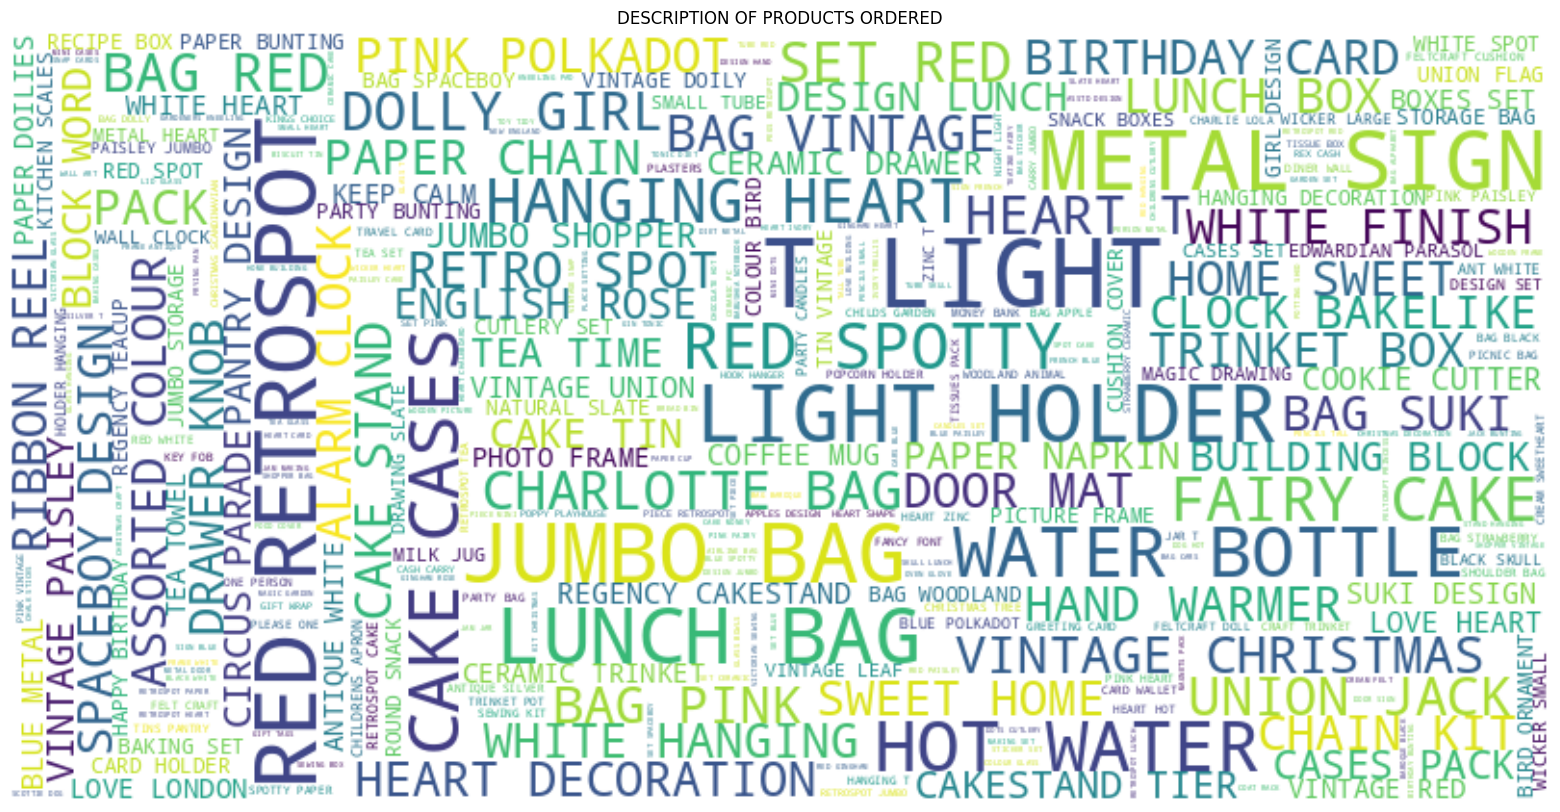

In [ ]:
# Concatenate the descriptions from all the months
combined_text = ' '.join(online_retail2_df['Description'])

# Set stopwords
stopwords = set(STOPWORDS)
stopwords.update(["abc"])

# Generating a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=300,stopwords=stopwords,
                      background_color="white",width=800, height=400).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('DESCRIPTION OF PRODUCTS ORDERED')
plt.show()

In [ ]:
# Exploring the number of unique customers per country

country_cus_counts = online_retail2_df.groupby('Country')['Customer ID'].nunique()
country_cus_counts = country_cus_counts.sort_values(ascending=False)

print('Count of all unique customers\n')
print(online_retail2_df['Customer ID'].nunique())
print("--------------------------------\n")
print(country_cus_counts)

Count of all unique customers

5878
--------------------------------

Country
United Kingdom          5350
Germany                  107
France                    95
Spain                     41
Belgium                   29
Portugal                  24
Netherlands               22
Switzerland               22
Sweden                    19
Italy                     17
Australia                 15
Finland                   14
Austria                   13
Channel Islands           13
Norway                    13
Denmark                   12
Cyprus                    11
Japan                     10
USA                        9
Poland                     6
Unspecified                6
EIRE                       5
Greece                     5
Canada                     5
Israel                     4
United Arab Emirates       4
RSA                        2
Korea                      2
Malta                      2
Brazil                     2
Bahrain                    2
Nigeria                

## Preparation of Data For Modelling - RFM feature extraction




The Customers will be analysed based on the below 3 factors:


1.   R (Recency): Number of days since last purchase
1.   F (Frequency): Number of transactions
2.   M (Monetary): Total amount of transactions (revenue contributed)







In [ ]:
#Recency extraction

reference_date = online_retail2_df["InvoiceDate"].max()
recency_df = online_retail2_df.groupby('Customer ID').agg(Recency=('InvoiceDate', lambda date: (reference_date - date.max()).days)).reset_index()
recency_df

Customer ID  Recency
0         12346.0      325
1         12347.0        1
2         12348.0       74
3         12349.0       18
4         12350.0      309
...           ...      ...
5873      18283.0        3
5874      18284.0      431
5875      18285.0      660
5876      18286.0      476
5877      18287.0       42

[5878 rows x 2 columns]

In [ ]:
# Frequency extraction

frequency_df = online_retail2_df.groupby('Customer ID').agg(Frequency=('Invoice', 'nunique')).reset_index()
frequency_df

Customer ID  Frequency
0         12346.0         12
1         12347.0          8
2         12348.0          5
3         12349.0          4
4         12350.0          1
...           ...        ...
5873      18283.0         22
5874      18284.0          1
5875      18285.0          1
5876      18286.0          2
5877      18287.0          7

[5878 rows x 2 columns]

In [ ]:
# Monetary Value extraction

monetary_df = online_retail2_df.groupby('Customer ID').agg(Monetary=('Total_Price', 'sum')).reset_index()
monetary_df

Customer ID  Monetary
0         12346.0  77556.46
1         12347.0   4921.53
2         12348.0   2019.40
3         12349.0   4428.69
4         12350.0    334.40
...           ...       ...
5873      18283.0   2664.90
5874      18284.0    461.68
5875      18285.0    427.00
5876      18286.0   1296.43
5877      18287.0   4182.99

[5878 rows x 2 columns]

In [ ]:
# Concatinating the recency, frequency and monetary dataframes.

rfm_online_retail2_df = pd.merge(recency_df, frequency_df, on='Customer ID')
rfm_online_retail2_df = pd.merge(rfm_online_retail2_df, monetary_df, on='Customer ID')
rfm_online_retail2_df.head()

Customer ID  Recency  Frequency  Monetary
0      12346.0      325         12  77556.46
1      12347.0        1          8   4921.53
2      12348.0       74          5   2019.40
3      12349.0       18          4   4428.69
4      12350.0      309          1    334.40

In [ ]:
rfm_online_retail2_df.dtypes

Customer ID    float64
Recency          int64
Frequency        int64
Monetary       float64
dtype: object

In [ ]:
rfm_online_retail2_df.shape

(5878, 4)

###Checking for outliers

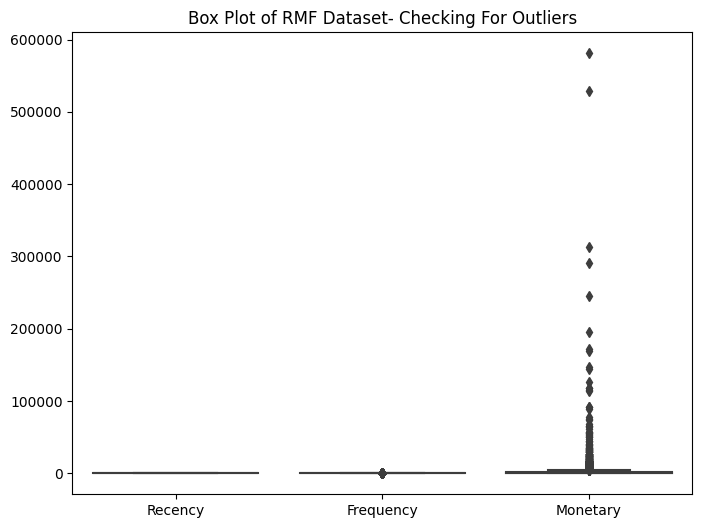

In [ ]:
# Creating a box plot to check for possible outliers

X = ['Recency','Frequency','Monetary']
plt.figure(figsize=(8, 6))
sns.boxplot(data=rfm_online_retail2_df[X])

plt.title('Box Plot of RMF Dataset- Checking For Outliers')
plt.show()

In [ ]:
# Identifying the outliers based on the box plot ploted above

threshold = 15
Quartile_1 = rfm_online_retail2_df.quantile(0.25)
Quartile_3 = rfm_online_retail2_df.quantile(0.75)
Inter_qrange = Quartile_3 -Quartile_1

lower_limit = Quartile_1 - threshold * Inter_qrange
upper_limit = Quartile_3 + threshold * Inter_qrange

# Removing outliers from the DataFrame
rfm_online_retail2_df = rfm_online_retail2_df[~((rfm_online_retail2_df < lower_limit) | (rfm_online_retail2_df > upper_limit)).any(axis=1)]

rfm_online_retail2_df

Customer ID  Recency  Frequency  Monetary
1         12347.0        1          8   4921.53
2         12348.0       74          5   2019.40
3         12349.0       18          4   4428.69
4         12350.0      309          1    334.40
5         12351.0      374          1    300.93
...           ...      ...        ...       ...
5873      18283.0        3         22   2664.90
5874      18284.0      431          1    461.68
5875      18285.0      660          1    427.00
5876      18286.0      476          2   1296.43
5877      18287.0       42          7   4182.99

[5819 rows x 4 columns]

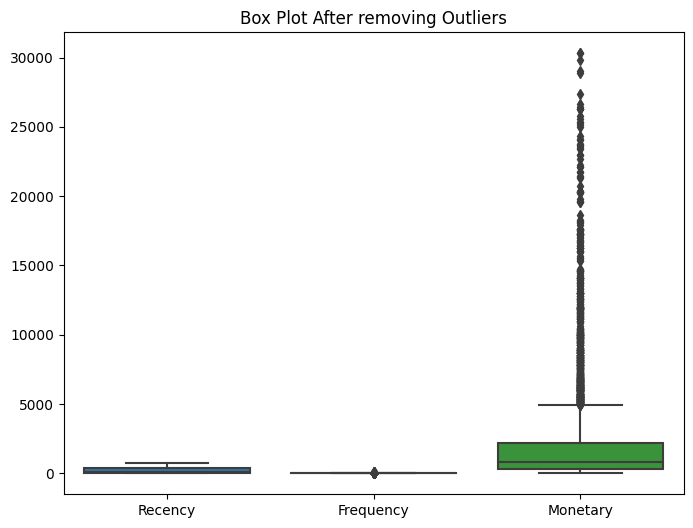

In [ ]:
# Confirming the Outlier Removal

plt.figure(figsize=(8, 6))
sns.boxplot(data=rfm_online_retail2_df[X])
plt.title('Box Plot After removing Outliers')
plt.show()

### Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Only the Recency, Frequency and Monetory Column will be scaled.

scaler = StandardScaler()
rfm_online_retail2_df_X = rfm_online_retail2_df[['Recency','Frequency','Monetary']]
rfm_df_scaled = scaler.fit_transform(rfm_online_retail2_df_X)

In [ ]:
rfm_df_scaled

array([[-0.95911807,  0.3558418 ,  0.86374363],
       [-0.61060376, -0.06942898, -0.00593286],
       [-0.8779572 , -0.21118591,  0.71605509],
       ...,
       [ 2.18705898, -0.63645669, -0.48312473],
       [ 1.30861198, -0.49469976, -0.22258408],
       [-0.76337716,  0.21408487,  0.64242657]])

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

Recency  Frequency  Monetary
0 -0.959118   0.355842  0.863744
1 -0.610604  -0.069429 -0.005933
2 -0.877957  -0.211186  0.716055
3  0.511326  -0.636457 -0.510874
4  0.821647  -0.636457 -0.520904

In [ ]:
rfm_df_scaled.shape

(5819, 3)

## Evaluating Appropriate Number of Clusters for Clustering Model





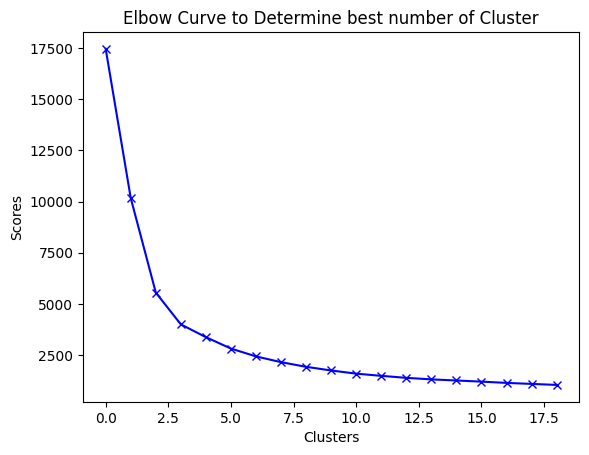

In [ ]:
# Determining number of clusters using the elbow method.

scores = []

for k in range(1,20):
  kmeans_m = KMeans(n_clusters = k, n_init=10)
  kmeans_m.fit(rfm_df_scaled)
  scores.append(kmeans_m.inertia_)

plt.plot(scores, 'bx-')
plt.title('Elbow Curve to Determine best number of Cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


From above, there is a significant drop off in difference between K=2.5 and k= 5. Let's further explore using other metrics to check whch is bet between 3, 4 and 5 clusters!


In [ ]:
# Importing necessary libaries for clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, Birch
from sklearn.metrics import silhouette_score
from itertools import product
import time

# Defining the range of clusters to evaluate
clustering_algorithms = [
    (KMeans, {'n_clusters': [3, 4, 5]}),
    (AgglomerativeClustering, {'n_clusters': [3, 4, 5]}),
    (SpectralClustering, {'n_clusters': [3, 4, 5]}),
    (Birch, {'n_clusters': [3, 4, 5]})
]

# Iterating over the clustering algorithms
for algorithm, params in clustering_algorithms:
    start_time = time.time() # starting time
    algorithm_name = algorithm.__name__
    param_name = list(params.keys())[0]
    param_values = list(params.values())[0]
    results  = []

    for param_value in param_values:
        kwargs = {param_name: param_value}

        if algorithm == KMeans:
            kwargs['n_init'] = 10

        clusterer = algorithm(**kwargs)
        cluster_labels = clusterer.fit_predict(rfm_df_scaled)
        silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
        results .append(silhouette_avg)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution time(s)

    # Printing results
    print(f"For {algorithm_name}:")
    for param_value, score in zip(param_values, results ):
        print(f" - {param_name}={param_value}: silhouette score = {score}")
    print("Execution_time: %.2f seconds" % execution_time)
    print("------------------------------------------------------")

For KMeans:
 - n_clusters=3: silhouette score = 0.5198053435859037
 - n_clusters=4: silhouette score = 0.5134184297112049
 - n_clusters=5: silhouette score = 0.47059878676262185
Execution_time: 3.23 seconds
------------------------------------------------------
For AgglomerativeClustering:
 - n_clusters=3: silhouette score = 0.49335682654101226
 - n_clusters=4: silhouette score = 0.456112715709634
 - n_clusters=5: silhouette score = 0.4603622770516088
Execution_time: 7.14 seconds
------------------------------------------------------
For SpectralClustering:
 - n_clusters=3: silhouette score = 0.7450689877633223
 - n_clusters=4: silhouette score = 0.7464167601152801
 - n_clusters=5: silhouette score = 0.7381832043883592
Execution_time: 31.22 seconds
------------------------------------------------------
For Birch:
 - n_clusters=3: silhouette score = 0.6994810024547634
 - n_clusters=4: silhouette score = 0.5482845409247441
 - n_clusters=5: silhouette score = 0.5194895518211272
Execution_

Silhouette Score: This metric measures how well each sample fits within its own cluster compared to other clusters. Higher values indicate better-defined and well-separated clusters.

In [ ]:
# Importing necessary libaries for clustering
from sklearn.metrics import davies_bouldin_score

# Iterate over the clustering algorithms and parameters
for algorithm, params in clustering_algorithms:
    start_time = time.time() # starting time
    algorithm_name = algorithm.__name__
    param_name = list(params.keys())[0]
    param_values = list(params.values())[0]
    results  = []

    for param_value in param_values:
        kwargs = {param_name: param_value}

        if algorithm == KMeans:
            kwargs['n_init'] = 10

        clusterer = algorithm(**kwargs)
        cluster_labels = clusterer.fit_predict(rfm_df_scaled)
        davies_bouldin_index = davies_bouldin_score(rfm_df_scaled, cluster_labels)
        results .append(davies_bouldin_index)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution time(s)

    # Printing results
    print(f"For {algorithm_name}:")
    for param_value, score in zip(param_values, results ):
        print(f" - {param_name}={param_value}: Davies-Bouldin Index = {score}")
    print("Execution_time: %.2f seconds" % execution_time)
    print("------------------------------------------------------")

For KMeans:
 - n_clusters=3: Davies-Bouldin Index = 0.6804324413261679
 - n_clusters=4: Davies-Bouldin Index = 0.7413329698562374
 - n_clusters=5: Davies-Bouldin Index = 0.8623602190196117
Execution_time: 2.64 seconds
------------------------------------------------------
For AgglomerativeClustering:
 - n_clusters=3: Davies-Bouldin Index = 0.6835402035347876
 - n_clusters=4: Davies-Bouldin Index = 0.8070552434301181
 - n_clusters=5: Davies-Bouldin Index = 0.933088526336536
Execution_time: 4.50 seconds
------------------------------------------------------
For SpectralClustering:
 - n_clusters=3: Davies-Bouldin Index = 0.5765791398360238
 - n_clusters=4: Davies-Bouldin Index = 0.6844885852166355
 - n_clusters=5: Davies-Bouldin Index = 0.6002965239675007
Execution_time: 30.60 seconds
------------------------------------------------------
For Birch:
 - n_clusters=3: Davies-Bouldin Index = 0.7967341864756178
 - n_clusters=4: Davies-Bouldin Index = 0.8914855404212896
 - n_clusters=5: Davies

For the above, the Davies-Bouldin Index is calculated using the davies_bouldin_score() function. The lower the Davies-Bouldin Index value, the better the clustering .

#### Kmeans Clustering

For the K-means clustering, 3 clusters will be plotted as the silhotte score had three as the highest and DBIndex had 3 as it lowest(best).

In [ ]:
# Kmean clustring with 3 clusters
np.random.seed(42)
start_time = time.time() # starting time

kmeans = KMeans(n_clusters=3, max_iter=50,n_init=10,random_state = 42)
kmeans.fit(rfm_df_scaled)

end_time = time.time() # end time
execution_time = end_time - start_time # Execution time(s)

print("Execution_time: %.2f seconds" % execution_time)

Execution_time: 0.51 seconds


In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 2], dtype=int32)

In [ ]:
rfm_online_retail2_df['cl_kmns'] = kmeans.labels_
rfm_online_retail2_df.head()

Customer ID  Recency  Frequency  Monetary  cl_kmns
1      12347.0        1          8   4921.53        2
2      12348.0       74          5   2019.40        2
3      12349.0       18          4   4428.69        2
4      12350.0      309          1    334.40        1
5      12351.0      374          1    300.93        1

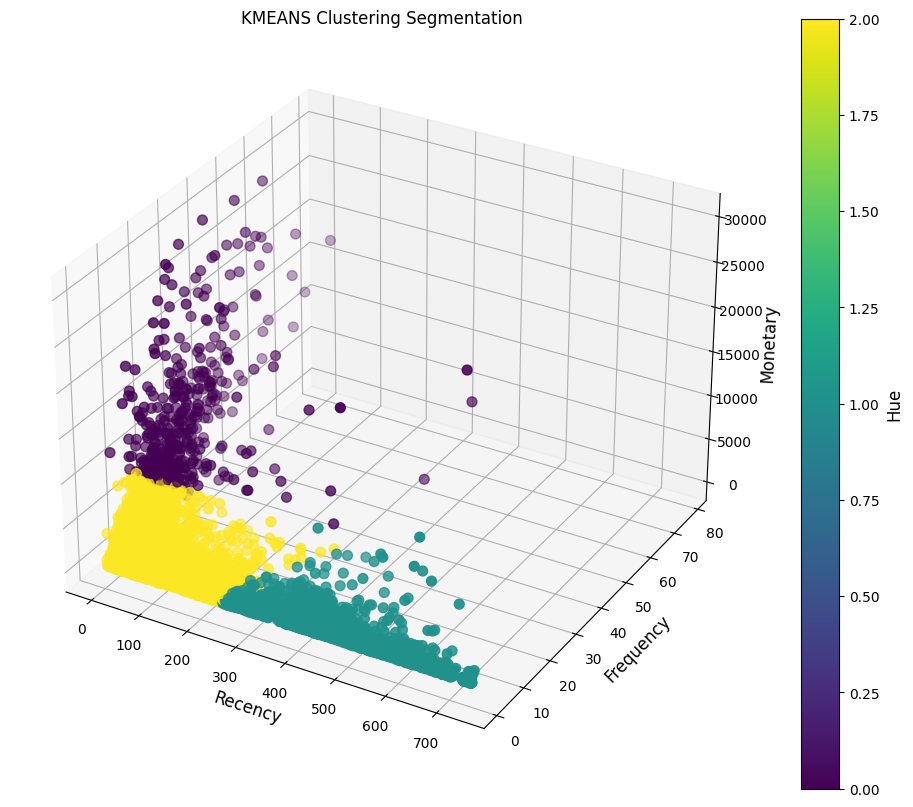

In [ ]:
# Creating a 3D scatter plot of the clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
scatter = ax.scatter( rfm_online_retail2_df['Recency'],
    rfm_online_retail2_df['Frequency'],
    rfm_online_retail2_df['Monetary'],
    c=rfm_online_retail2_df['cl_kmns'],
    cmap = 'viridis',
    s=50 )

ax.set_xlabel('Recency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Monetary', fontsize=12)
ax.set_title('KMEANS Clustering Segmentation')

cbar = plt.colorbar(scatter)
cbar.set_label('Hue', fontsize=12)
plt.show()

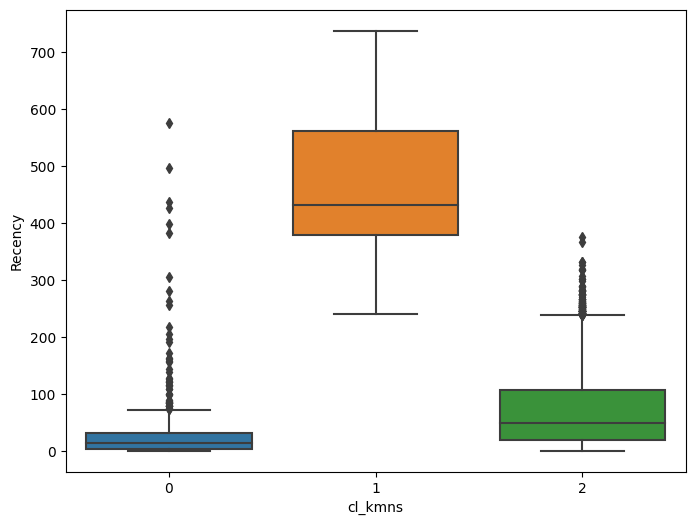

In [ ]:
# Box plot to visualize Cluster labels and Recency for K-means clustered labels

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_kmns', y='Recency', data= rfm_online_retail2_df)
plt.show()

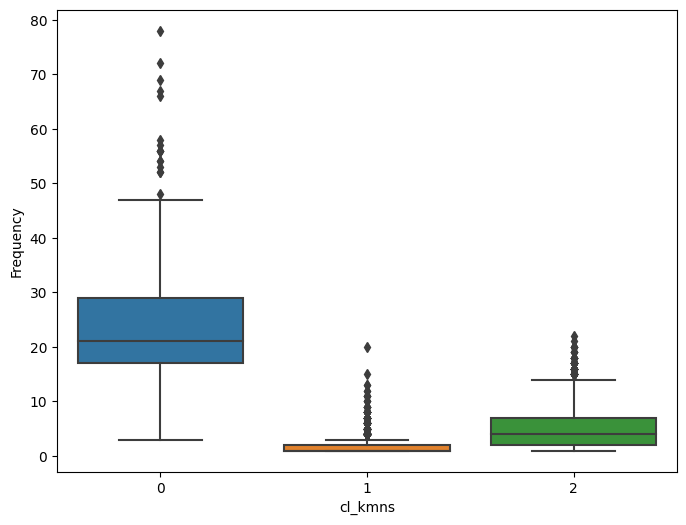

In [ ]:
# Box plot to visualize Cluster labels and Frequency for K-means clustered labels

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_kmns', y='Frequency', data= rfm_online_retail2_df)
plt.show()

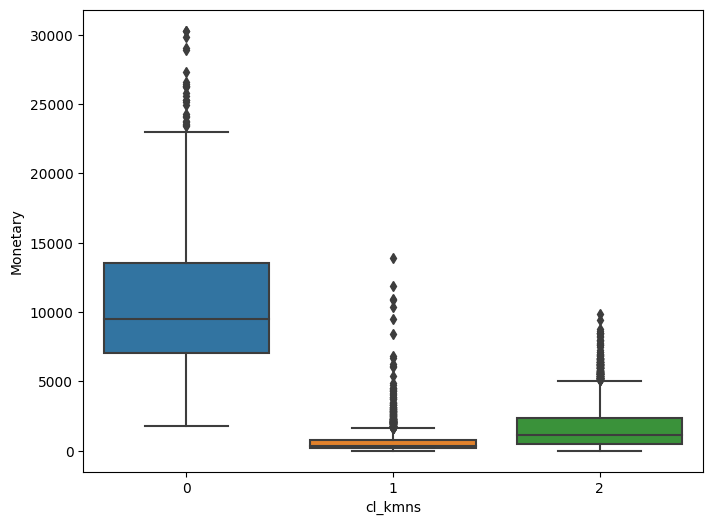

In [ ]:
# Box plot to visualize Cluster labels and Recency for K-means clustered labels


plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_kmns', y='Monetary', data= rfm_online_retail2_df)
plt.show()


#### Agglomerative clusters

In [ ]:
# For agglomerative, the number of clusters will be set to three

start_time = time.time() # starting time

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(rfm_df_scaled)

end_time = time.time() # end time
execution_time = end_time - start_time # Execution time(s)

print("Execution_time: %.2f seconds" % execution_time)

Execution_time: 1.49 seconds


In [ ]:
rfm_online_retail2_df['cl_Ag'] = agglomerative_labels
rfm_online_retail2_df.head()

Customer ID  Recency  Frequency  Monetary  cl_kmns  cl_Ag
1      12347.0        1          8   4921.53        2      0
2      12348.0       74          5   2019.40        2      0
3      12349.0       18          4   4428.69        2      0
4      12350.0      309          1    334.40        1      0
5      12351.0      374          1    300.93        1      2

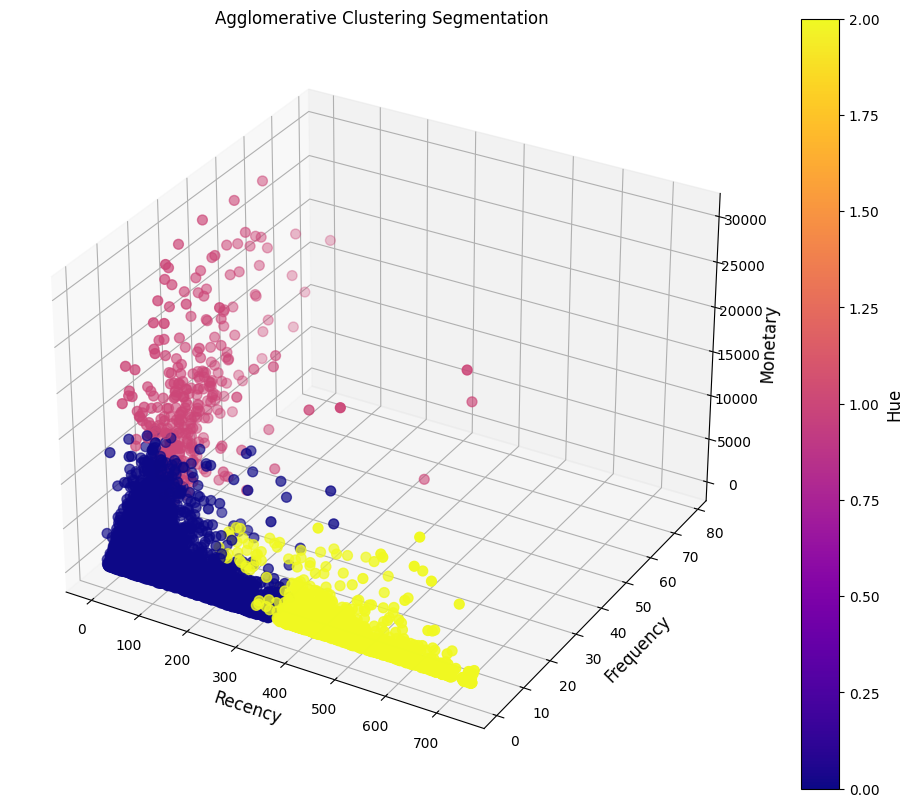

In [ ]:
# Creating a 3D scatter plot of the clusters from agglomerative modelling

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter( rfm_online_retail2_df['Recency'],
    rfm_online_retail2_df['Frequency'],
    rfm_online_retail2_df['Monetary'],
    c=rfm_online_retail2_df['cl_Ag'],
    cmap = 'plasma',
    s=50 )

ax.set_xlabel('Recency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Monetary', fontsize=12)
ax.set_title('Agglomerative Clustering Segmentation')

cbar = plt.colorbar(scatter)
cbar.set_label('Hue', fontsize=12)
plt.show()

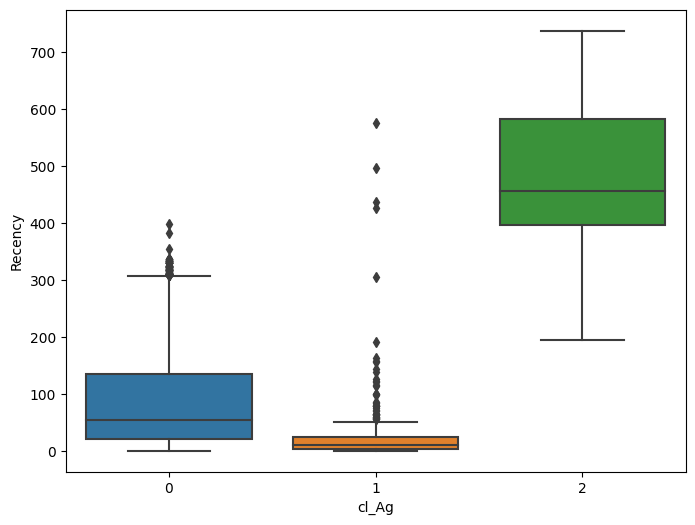

In [ ]:
# Box plot to visualize Cluster Id vs Recency for Agglomerative clustered labels

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_Ag', y='Recency', data= rfm_online_retail2_df)
plt.show()

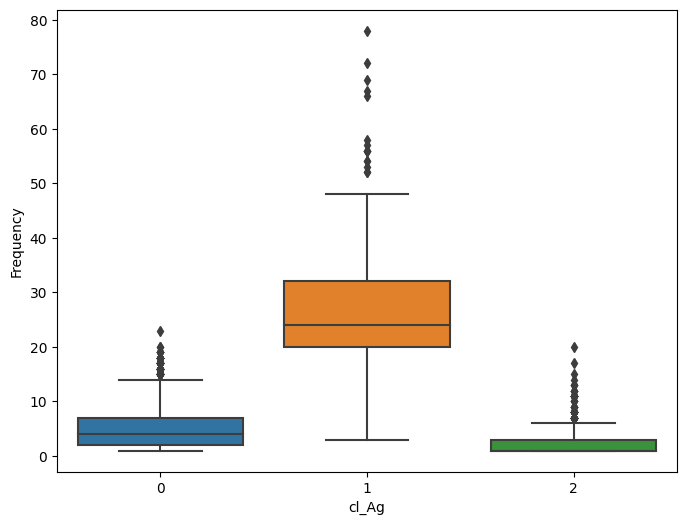

In [ ]:
# Box plot to visualize Cluster Id vs Frequency for for Agglomerative clustered labels
plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_Ag', y='Frequency', data= rfm_online_retail2_df)
plt.show()

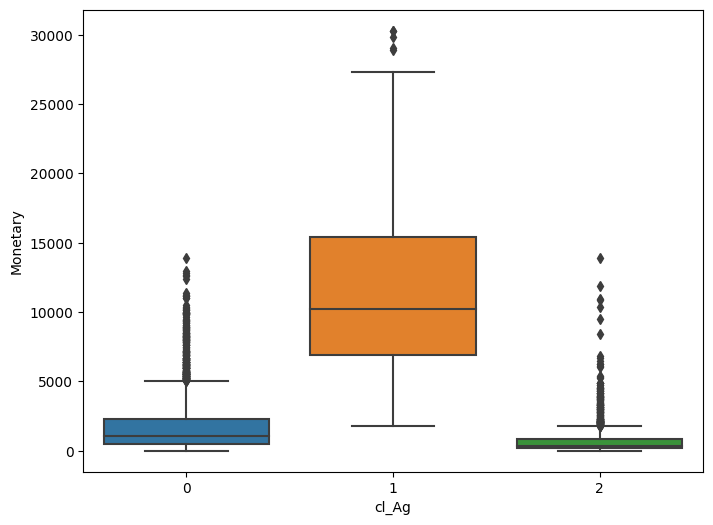

In [ ]:
# Box plot to visualize Cluster Id vs Monetary for for Agglomerative clustered labels
plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_Ag', y='Monetary', data= rfm_online_retail2_df)
plt.show()

#### Spectral Clustering


In [ ]:
# The number of clusters is set to three for spectral clustering

start_time = time.time() # starting time

spectral = SpectralClustering(n_clusters=3)
spectral_labels = spectral.fit_predict(rfm_df_scaled)

end_time = time.time() # end time
execution_time = end_time - start_time # Execution time(s)

print("Execution_time: %.2f seconds" % execution_time)

Execution_time: 10.63 seconds


In [ ]:
rfm_online_retail2_df['cl_sp'] = spectral_labels
rfm_online_retail2_df.head()

Customer ID  Recency  Frequency  Monetary  cl_kmns  cl_Ag  cl_sp
1      12347.0        1          8   4921.53        2      0      0
2      12348.0       74          5   2019.40        2      0      0
3      12349.0       18          4   4428.69        2      0      0
4      12350.0      309          1    334.40        1      0      0
5      12351.0      374          1    300.93        1      2      0

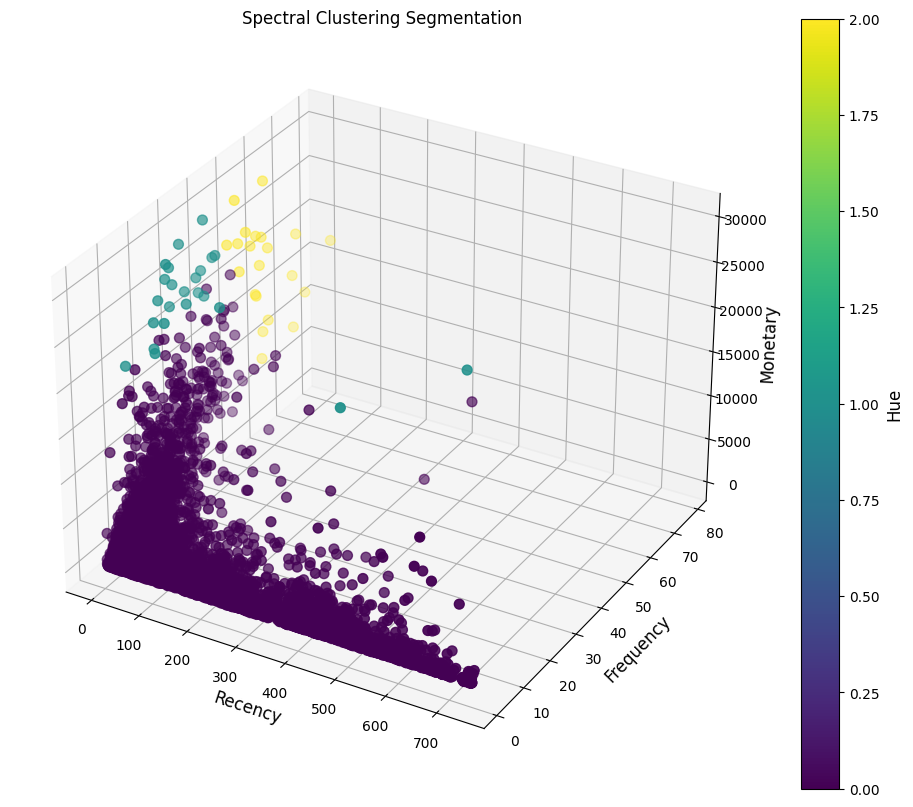

In [ ]:
# Creating a 3D scatter plot of the clusters from Spectral modelling

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter( rfm_online_retail2_df['Recency'],
    rfm_online_retail2_df['Frequency'],
    rfm_online_retail2_df['Monetary'],
    c=rfm_online_retail2_df['cl_sp'],
    cmap = 'viridis',
    s=50 )

ax.set_xlabel('Recency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Monetary', fontsize=12)
ax.set_title('Spectral Clustering Segmentation')

cbar = plt.colorbar(scatter)
cbar.set_label('Hue', fontsize=12)
plt.show()

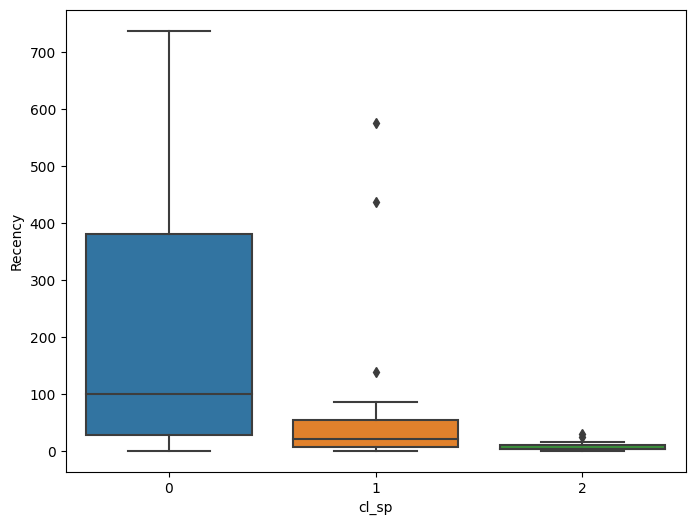

In [ ]:
# Box plot to visualize Cluster Id vs Recency for spectral clustering

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_sp', y='Recency', data= rfm_online_retail2_df)
plt.show()

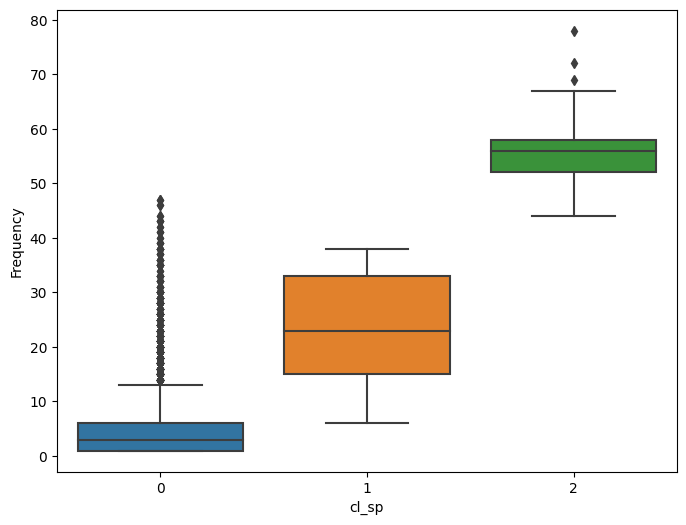

In [ ]:
# Box plot to visualize Cluster Id vs Frequency for spectral clustering
plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_sp', y='Frequency', data= rfm_online_retail2_df)
plt.show()

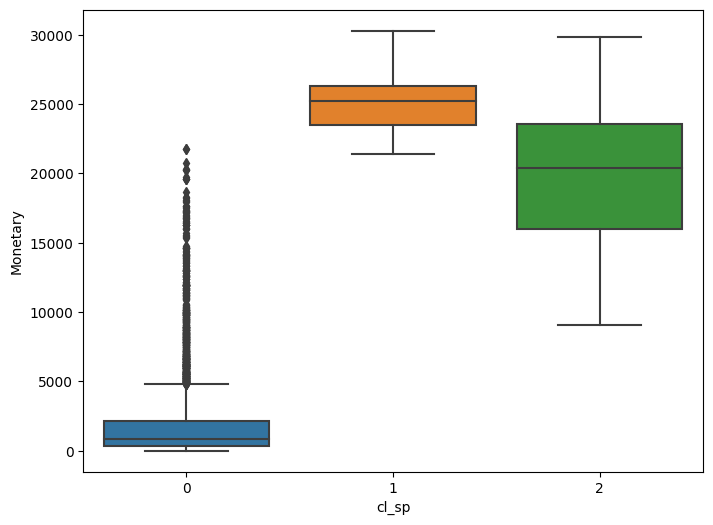

In [ ]:
# Box plot to visualize Cluster Id vs Monetary for spectral clustering

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_sp', y='Monetary', data= rfm_online_retail2_df)
plt.show()

#### Birch Clustering

In [ ]:
# Three number of clusters are selected for Birch clustering
start_time = time.time() # starting time

birch = Birch(n_clusters=3)
birch_cluster_labels = birch.fit_predict(rfm_df_scaled)

end_time = time.time() # end time
execution_time = end_time - start_time # Execution time(s)

print("Execution_time: %.2f seconds" % execution_time)

Execution_time: 0.16 seconds


In [ ]:
rfm_online_retail2_df['cl_bc'] = birch_cluster_labels
rfm_online_retail2_df.head()

Customer ID  Recency  Frequency  Monetary  cl_kmns  cl_Ag  cl_sp  cl_bc
1      12347.0        1          8   4921.53        2      0      0      0
2      12348.0       74          5   2019.40        2      0      0      0
3      12349.0       18          4   4428.69        2      0      0      0
4      12350.0      309          1    334.40        1      0      0      0
5      12351.0      374          1    300.93        1      2      0      0

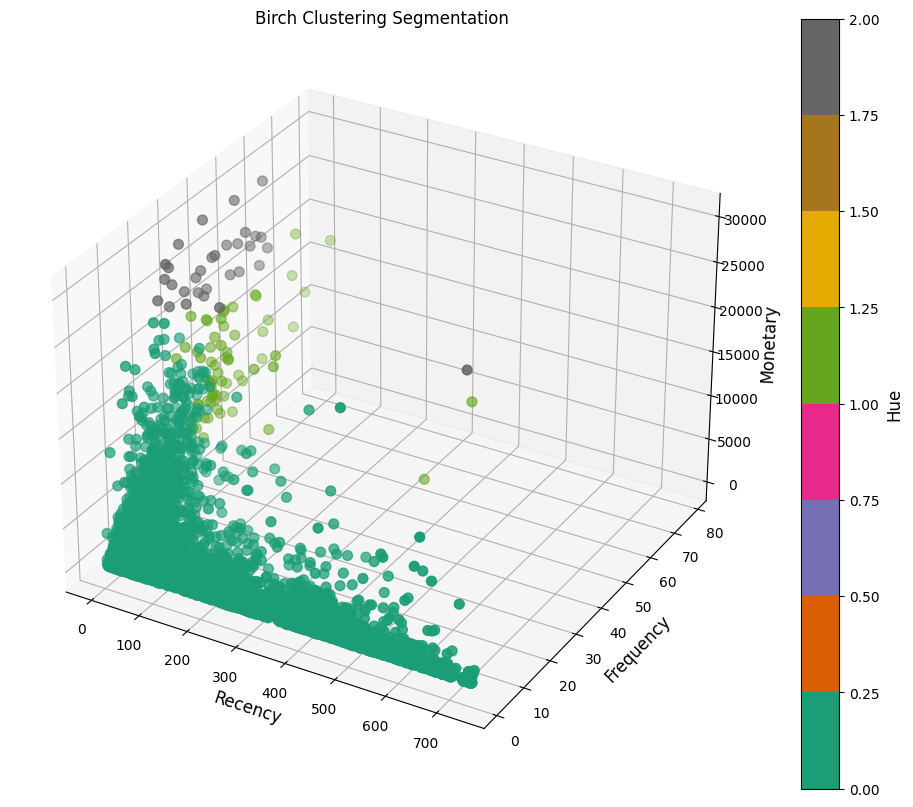

In [ ]:
# Creating a 3D scatter plot of the clusters from Birch  modelling

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter( rfm_online_retail2_df['Recency'],
    rfm_online_retail2_df['Frequency'],
    rfm_online_retail2_df['Monetary'],
    c=rfm_online_retail2_df['cl_bc'],
    cmap = 'Dark2',
    s=50 )

ax.set_xlabel('Recency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Monetary', fontsize=12)
ax.set_title('Birch Clustering Segmentation')

cbar = plt.colorbar(scatter)
cbar.set_label('Hue', fontsize=12)
plt.show()

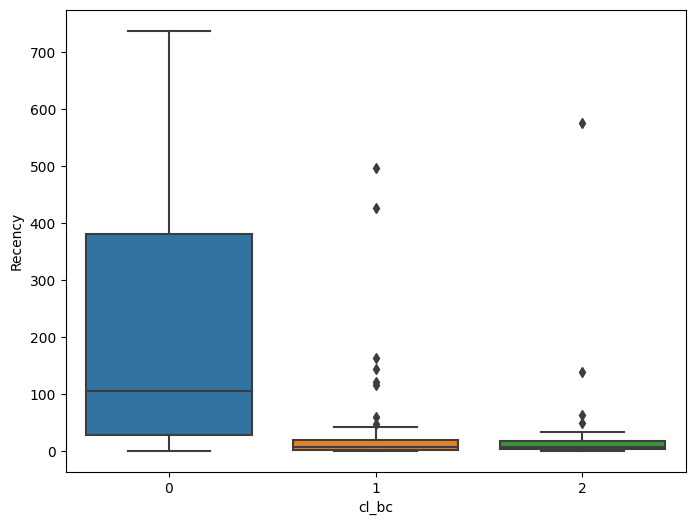

In [ ]:
# Box plot to visualize Cluster Id vs Recency for Birch Clustering

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_bc', y='Recency', data= rfm_online_retail2_df)
plt.show()

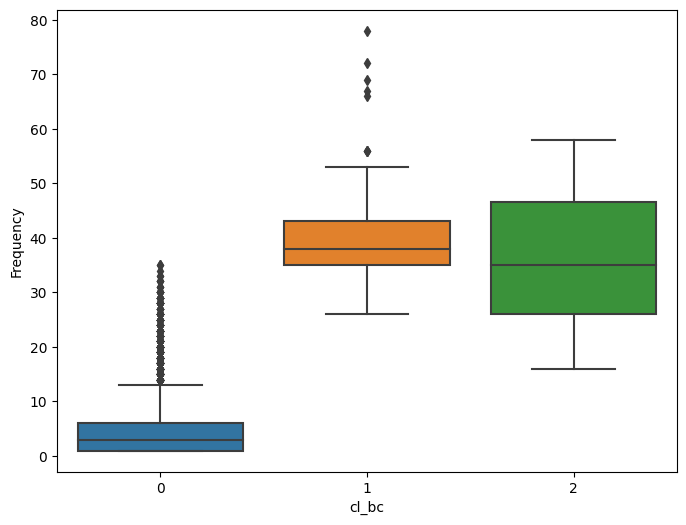

In [ ]:
# Box plot to visualize Cluster Id vs Frequency for Birch Clustering

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_bc', y='Frequency', data= rfm_online_retail2_df)
plt.show()

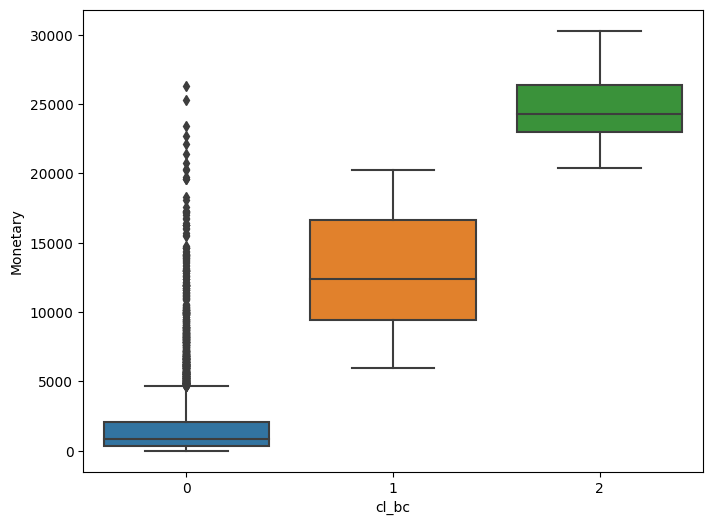

In [ ]:
# Box plot to visualize Cluster Id vs Monetary for Birch Clustering

plt.figure(figsize=(8, 6))
sns.boxplot(x='cl_bc', y='Monetary', data= rfm_online_retail2_df)
plt.show()

### Saving the Best Cluster


From the above clusering evaluation and visualizations, K means and Agglomerative shows to give the better segments of three points. Any can be choosen to be saved as the segmented points. For this project, the K means clustering will be the saved model as it has a slighty better Silhotte score value for the chosen number of cluster(3)  when compared to Agglomerative.


In [ ]:
rfm_online_retail2_df = rfm_online_retail2_df.drop(['cl_Ag','cl_sp','cl_bc'], axis=1)
rfm_online_retail2_df

Customer ID  Recency  Frequency  Monetary  cl_kmns
1         12347.0        1          8   4921.53        2
2         12348.0       74          5   2019.40        2
3         12349.0       18          4   4428.69        2
4         12350.0      309          1    334.40        1
5         12351.0      374          1    300.93        1
...           ...      ...        ...       ...      ...
5873      18283.0        3         22   2664.90        2
5874      18284.0      431          1    461.68        1
5875      18285.0      660          1    427.00        1
5876      18286.0      476          2   1296.43        1
5877      18287.0       42          7   4182.99        2

[5819 rows x 5 columns]

**Visualizing the the differnt customer segments for the saved model**

In [ ]:
cluster_0_df = rfm_online_retail2_df[rfm_online_retail2_df['cl_kmns']==0]
cluster_0_df

Customer ID  Recency  Frequency  Monetary  cl_kmns
11        12357.0       32          3  18287.66        0
13        12359.0       57         10   8873.39        0
34        12380.0       21         11   9676.30        0
62        12409.0       78          7  23419.29        0
70        12417.0        2         20   6797.41        0
...           ...      ...        ...       ...      ...
5819      18229.0       11         28  10150.51        0
5821      18231.0      191         28   6854.17        0
5835      18245.0        6         20   6324.98        0
5841      18251.0       86          9  26278.86        0
5850      18260.0      172         23   9947.26        0

[446 rows x 5 columns]

In [ ]:
cluster_1_df = cluster_0_df = rfm_online_retail2_df[rfm_online_retail2_df['cl_kmns']==1]
cluster_1_df

Customer ID  Recency  Frequency  Monetary  cl_kmns
4         12350.0      309          1    334.40        1
5         12351.0      374          1    300.93        1
15        12361.0      286          4    511.25        1
19        12365.0      290          2    641.38        1
20        12366.0      633          1    500.24        1
...           ...      ...        ...       ...      ...
5869      18279.0      518          1    231.34        1
5870      18280.0      277          2    488.15        1
5874      18284.0      431          1    461.68        1
5875      18285.0      660          1    427.00        1
5876      18286.0      476          2   1296.43        1

[1974 rows x 5 columns]

In [ ]:
cluster_2_df = cluster_0_df = rfm_online_retail2_df[rfm_online_retail2_df['cl_kmns']==2]
cluster_2_df

Customer ID  Recency  Frequency  Monetary  cl_kmns
1         12347.0        1          8   4921.53        2
2         12348.0       74          5   2019.40        2
3         12349.0       18          4   4428.69        2
6         12352.0       35         10   2849.84        2
7         12353.0      203          2    406.76        2
...           ...      ...        ...       ...      ...
5868      18278.0       73          2    414.20        2
5871      18281.0      180          2    201.14        2
5872      18282.0        7          2    178.05        2
5873      18283.0        3         22   2664.90        2
5877      18287.0       42          7   4182.99        2

[3399 rows x 5 columns]

<Axes: xlabel='cl_kmns', ylabel='count'>

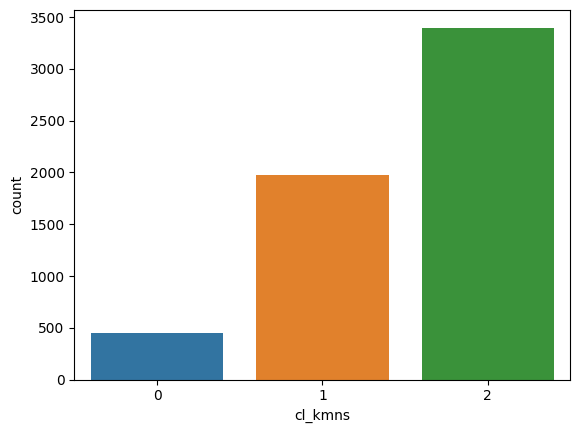

In [ ]:
#Visualization
sns.countplot(x='cl_kmns', data=rfm_online_retail2_df)

In [ ]:
# Saving Scikitlearn models
import joblib
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

## Classification Models Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# Define the list of models
models = [
    ("SVM", SVC()),
    ("Logistic_Regression", LogisticRegression(max_iter=100000)),
    ("Random_Forest", RandomForestClassifier()),
    ("Naive_Bayes", MultinomialNB())
]

In [ ]:
# Spliting the dataset into training and testing sets
X = rfm_online_retail2_df[['Recency',	'Frequency',	'Monetary']]
y = rfm_online_retail2_df['cl_kmns']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Looping through each model to train, predict, and evaluate
for name, model_tts in models:
    start_time = time.time() # start time

    # Model training
    model_tts.fit(X_train, y_train)

    # Making predictions on the testing set
    y_pred = model_tts.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution tims(s)

    # Printing Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}\n")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")

Model: SVM
Accuracy: 0.9639175257731959
Confusion Matrix:
[[ 107    0   27]
 [   4  570   20]
 [  11    1 1006]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       134
           1       1.00      0.96      0.98       594
           2       0.96      0.99      0.97      1018

    accuracy                           0.96      1746
   macro avg       0.94      0.92      0.93      1746
weighted avg       0.96      0.96      0.96      1746


Execution time: 0.27 seconds
-------------------------------------------------

Model: Logistic_Regression
Accuracy: 0.9994272623138603
Confusion Matrix:
[[ 133    0    1]
 [   0  594    0]
 [   0    0 1018]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       1.00      1.00      1.00       594
           2       1.00      1.00      1.00      1018

    accuracy                    

In [ ]:
result_output = []
for name, cls_model in models:
    start_time = time.time()
    cls_model.fit(X_train, y_train)
    y_pred = cls_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    confusion_mat = confusion_matrix(y_test, y_pred)
    tn = confusion_mat[0, 0]
    fp = confusion_mat[0, 1:].sum()
    fn = confusion_mat[1:, 0].sum()
    tp = confusion_mat[1:, 1:].sum()


    cls_report = classification_report(y_test, y_pred, output_dict=True)
    end_time = time.time()
    execution_time = end_time - start_time  # Execution time (s)
    result = {'Model': name, 'Accuracy': accuracy, 'Execution Time (s)': execution_time}
    result.update(cls_report['macro avg'])

    for class_label, metrics in cls_report.items():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg', 'micro avg']:
            class_name = f'{class_label}'
            result.update({f'{class_name}_TN': confusion_mat[int(class_label), int(class_label)],
                           f'{class_name}_FP': confusion_mat[:, int(class_label)].sum() - confusion_mat[int(class_label), int(class_label)],
                           f'{class_name}_FN': confusion_mat[int(class_label), :].sum() - confusion_mat[int(class_label), int(class_label)],
                           f'{class_name}_TP': confusion_mat.sum() - confusion_mat[:, int(class_label)].sum() - confusion_mat[int(class_label), :]
                                                                                        .sum() + confusion_mat[int(class_label), int(class_label)]})

    result_output.append(result)

# Create a DataFrame from the result
result_output = pd.DataFrame(result_output)
result_output


Model  Accuracy  Execution Time (s)  precision    recall  \
0                  SVM  0.963918            0.307326   0.943554  0.915439   
1  Logistic_Regression  0.999427            0.119937   0.999673  0.997512   
2        Random_Forest  0.997136            0.561992   0.995720  0.994043   
3          Naive_Bayes  0.703895            0.013214   0.661255  0.808985   

   f1-score  support  0_TN  0_FP  0_FN  0_TP  1_TN  1_FP  1_FN  1_TP  2_TN  \
0  0.928663     1746   107    15    27  1597   570     1    24  1151  1006   
1  0.998588     1746   133     0     1  1612   594     0     0  1152  1018   
2  0.994875     1746   132     1     2  1611   594     2     0  1150  1015   
3  0.659647     1746   130   309     4  1303   538   148    56  1004   561   

   2_FP  2_FN  2_TP  
0    47    12   681  
1     1     0   727  
2     2     3   726  
3    60   457   668

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

X = rfm_online_retail2_df[['Recency',	'Frequency',	'Monetary']]
y = rfm_online_retail2_df['cl_kmns']

# Seting up k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Looping through each model to train, predict, and evaluate with cross-validation
for name, model_cv in models:
    start_time = time.time() # start time

    # Fiting the model on the training data
    model_cv.fit(X, y)

    # Making predictions
    y_pred = cross_val_predict(model_cv, X, y, cv =cv)

    # Evaluating the model
    accuracy = accuracy_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred)
    classification_rep = classification_report(y, y_pred)

    end_time = time.time() # end time
    execution_time = end_time - start_time # Execution tims(s)

    # Printing Evaluation Metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}\n")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")

Model: SVM
Accuracy: 0.9680357449733631
Confusion Matrix:
[[ 362    0   84]
 [   9 1916   49]
 [  38    6 3355]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       446
           1       1.00      0.97      0.98      1974
           2       0.96      0.99      0.97      3399

    accuracy                           0.97      5819
   macro avg       0.95      0.92      0.93      5819
weighted avg       0.97      0.97      0.97      5819


Execution time: 1.69 seconds
-------------------------------------------------

Model: Logistic_Regression
Accuracy: 0.9994844474995703
Confusion Matrix:
[[ 445    0    1]
 [   0 1974    0]
 [   1    1 3397]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       446
           1       1.00      1.00      1.00      1974
           2       1.00      1.00      1.00      3399

    accuracy                    

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
result_output = []
for name, model_cv in models:
    start_time = time.time()
    y_pred = cross_val_predict(model_cv, X, y, cv =cv)

    accuracy = accuracy_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred)

    tn = confusion_mat[0, 0]
    fp = confusion_mat[0, 1:].sum()
    fn = confusion_mat[1:, 0].sum()
    tp = confusion_mat[1:, 1:].sum()

    cls_report = classification_report(y, y_pred, output_dict=True)
    end_time = time.time()
    execution_time = end_time - start_time  # Execution time (s)
    result = {'Model': name, 'Accuracy': accuracy, 'Execution Time (s)': execution_time}
    result.update(cls_report['macro avg'])

    # Add metrics for each class
    for class_label, metrics in cls_report.items():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg', 'micro avg']:
            class_name = f'{class_label}'
            result.update({f'{class_name}_TN': confusion_mat[int(class_label), int(class_label)],
                           f'{class_name}_FP': confusion_mat[:, int(class_label)].sum() - confusion_mat[int(class_label), int(class_label)],
                           f'{class_name}_FN': confusion_mat[int(class_label), :].sum() - confusion_mat[int(class_label), int(class_label)],
                           f'{class_name}_TP': confusion_mat.sum() - confusion_mat[:, int(class_label)].sum() - confusion_mat[int(class_label), :]
                                                                                      .sum() + confusion_mat[int(class_label), int(class_label)]})

    result_output.append(result)

# Creating a DataFrame
result_output = pd.DataFrame(result_output)
result_output

Model  Accuracy  Execution Time (s)  precision    recall  \
0                  SVM  0.968036            1.629514   0.947944  0.923111   
1  Logistic_Regression  0.999484            0.666245   0.998986  0.999056   
2        Random_Forest  0.995532            1.949002   0.994058  0.992480   
3          Naive_Bayes  0.708025            0.042103   0.664706  0.810815   

   f1-score  support  0_TN  0_FP  0_FN  0_TP  1_TN  1_FP  1_FN  1_TP  2_TN  \
0  0.934885     5819   362    47    84  5326  1916     6    58  3839  3355   
1  0.999021     5819   445     1     1  5372  1974     1     0  3844  3397   
2  0.993265     5819   439     4     7  5369  1968    11     6  3834  3386   
3  0.661388     5819   424   984    22  4389  1857   576   117  3269  1839   

   2_FP  2_FN  2_TP  
0   133    44  2287  
1     1     2  2419  
2    11    13  2409  
3   139  1560  2281

#### Saving the best classification

In [ ]:
# Saving the best classification model to a file for future predictions
logreg_model = models[0][1]

model_filename = "logreg_model.pkl"
joblib.dump(logreg_model, model_filename)

['logreg_model.pkl']

In [ ]:
# online_retail2_df.to_csv('online_retail2_df.csv', index=False)

# from google.colab import files
# files.download('online_retail2_df.csv')

## References



[Scikit Learn Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

[UCI Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

[Pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

